<a href="https://colab.research.google.com/github/umeshpardeshi9545/AirBnb-Bookings-Analysis/blob/main/Airbnb_NYC_2019_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
from datetime import datetime
from datetime import date


In [111]:
# Load Dataset
file_path="/content/Airbnb NYC 2019.csv"
df= pd.read_csv(file_path)

In [112]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [113]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [114]:
# Dataset Rows & Columns count
df.shape
print(df.shape)
print(f"total number of rows in given data set is {df.shape[0]}")
print(f"total number of columns in given data set is {df.shape[1]}")

(48895, 16)
total number of rows in given data set is 48895
total number of columns in given data set is 16


In [115]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [116]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [117]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

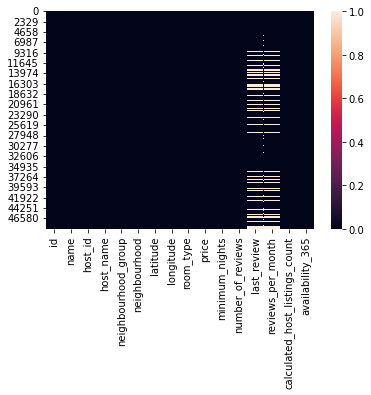

In [118]:
# Visualizing the missing values
sns.heatmap(df.isnull() )

In [119]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [120]:
# Dataset Describe
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [121]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


In [122]:

# As we seen that there is maximum null value in reviews_per_month and last_review in column so we are replacing null value by '0'

df.fillna({'reviews_per_month':0,'last_review':0}, inplace=True)
 
print(f" After replacing NaN with 0 : {df.isnull().sum()}")





 After replacing NaN with 0 : id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


In [123]:
# We have seen that value in neighbourhood_group & room_type column element is repeating so we are extracting unique element from respective columns

# 1) for column 'neighbourhood_group'
print(df.neighbourhood_group.unique())

# 2) for coloumn 'room_type'
print(df.room_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [124]:
# Creating  Dataframe df copy for further data modification

df_copy = df.copy()

In [125]:
#  As we seen dataset column 'last_review' contain data in form of date so we converting it in date function and with the same creating new column of year by extracting year from date
df_copy['year']= pd.to_datetime(df_copy['last_review']).dt.to_period('Y').astype(str )
print(df_copy['year'])

0        2018
1        2019
2        1970
3        2019
4        2018
         ... 
48890    1970
48891    1970
48892    1970
48893    1970
48894    1970
Name: year, Length: 48895, dtype: object


In [126]:
# Modified updated data set  (adding new column 'year')
print(df_copy.shape)
df_copy

(48895, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,1970
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,1970
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,1970
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,1970
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,1970


In [127]:
# Most booked neighbourhood_group
top_neighbourhood_groups=df.neighbourhood_group.value_counts().reset_index()
top_neighbourhood_groups

,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



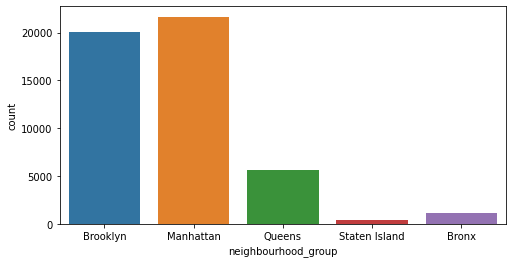

In [128]:
df.neighbourhood_group.value_counts()

# Chart - 1 visualization code
plt.figure(figsize=(8,4))
ax = sns.countplot(df["neighbourhood_group"])
print(ax)

In [129]:
#  Top neighbourhood_group as per review
ng_vs_rpm = df.groupby(['neighbourhood_group',])['reviews_per_month'].sum()
round(ng_vs_rpm.reset_index(), 0)

,neighbourhood_group,reviews_per_month
0,Bronx,1610.0
1,Brooklyn,21105.0
2,Manhattan,21158.0
3,Queens,8879.0
4,Staten Island,588.0


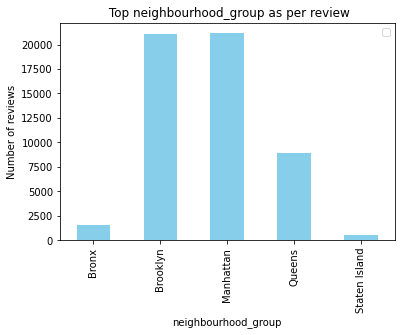

In [130]:

# Chart - 2 visualization code
plt.figure()

ng_vs_rpm.plot.bar(x ='neighbourhood_group', y='reviews_per_month', rot=0, color='skyblue')
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of reviews')
plt.title(' Top neighbourhood_group as per review')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()

In [131]:
# Min price as per room type
min_roomtype_price = df.replace(0, np.nan, inplace=False).groupby(['neighbourhood_group','room_type'])['price'].min().unstack()
min_roomtype_price



room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,28.0,10.0,20.0
Brooklyn,10.0,10.0,15.0
Manhattan,10.0,10.0,10.0
Queens,10.0,10.0,11.0
Staten Island,48.0,20.0,13.0


AxesSubplot(0.125,0.125;0.62x0.755)


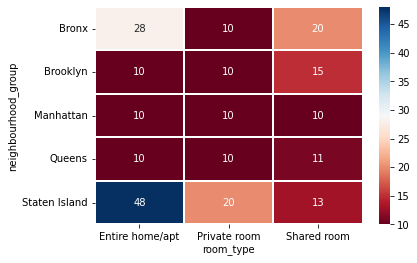

In [132]:
# Min price as per room type
min_roomtype_price = df.replace(0, np.nan, inplace=False).groupby(['neighbourhood_group','room_type'])['price'].min().unstack()
min_roomtype_price


# Chart - 3 visualization code
min_price=sns.heatmap(min_roomtype_price, cmap='RdBu' , annot=True , fmt=".0f",linewidths=1 )
print(min_price)

In [133]:
# total diff room type count  availbale in neighbourhood_group
room_type_share_as_neighbourhood_group= df.groupby(['room_type','neighbourhood_group'])['neighbourhood_group'].count().unstack()
room_type_share_as_neighbourhood_group

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,379,9559,13199,2096,176
Private room,652,10132,7982,3372,188
Shared room,60,413,480,198,9


AxesSubplot(0.125,0.125;0.62x0.755)


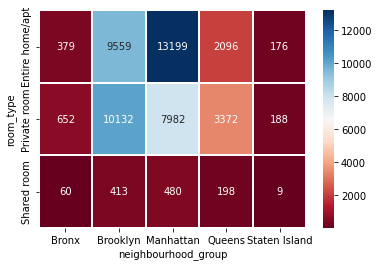

In [134]:
# Chart - 4 visualization code

rt_as_ng=sns.heatmap(room_type_share_as_neighbourhood_group, cmap='RdBu' , annot=True , fmt=".0f" ,linewidths=1)
print(rt_as_ng)

In [135]:
# Mean price as per room type
mean_roomtype_price = df.replace(0, np.nan, inplace=False).groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
round(mean_roomtype_price,0)


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,128.0,67.0,60.0
Brooklyn,178.0,77.0,51.0
Manhattan,249.0,117.0,89.0
Queens,147.0,72.0,69.0
Staten Island,174.0,62.0,57.0


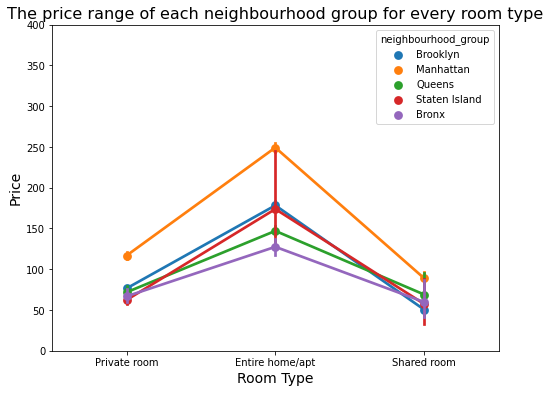

In [136]:
# Chart - 5 visualization code
plt.figure(figsize = [8,6])

ax = sns.pointplot(data = df, x = 'room_type', y = 'price', hue = 'neighbourhood_group')
ax.set_yticklabels([0,400,50], minor = True)
plt.title('The price range of each neighbourhood group for every room type', fontsize = 16)
plt.xlabel('Room Type',fontsize = 14)
plt.ylabel('Price', fontsize = 14)
ax.set_ylim(0,400)
ax.set_yticks(range(0,450, 50))
plt.show()

In [137]:
#  Avergarge room availability in  neighbourhood_group
mean_availability=df.replace(0, np.nan, inplace=False).groupby(['neighbourhood_group'])['availability_365'].mean().sort_values(ascending=False)
mean_availability.round().reset_index()

,neighbourhood_group,availability_365
0,Staten Island,225.0
1,Bronx,198.0
2,Queens,190.0
3,Manhattan,179.0
4,Brooklyn,164.0


Text(0.5, 0, 'neighbourhood_group')

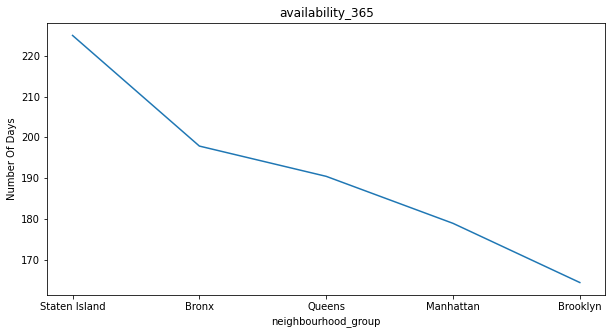

In [138]:
# Chart - 8 visualization code
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(mean_availability)

plt.title('availability_365')
plt.ylabel('Number Of Days')
plt.xlabel('neighbourhood_group')

In [139]:
review_till_year=df_copy.groupby(['year'])['number_of_reviews'].count().sort_index(ascending=False)
review_till_year_copy=review_till_year.head(7)
review_till_year_copy.reset_index()


,year,number_of_reviews
0,2019,25209
1,2018,6050
2,2017,3205
3,2016,2707
4,2015,1393
5,2014,199
6,2013,48


Text(0.5, 0, 'Year')

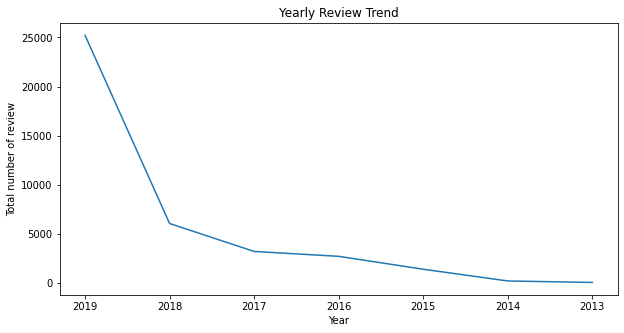

In [140]:
# Chart - 9 visualization code
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(review_till_year_copy)

plt.title('Yearly Review Trend')
plt.ylabel('Total number of review')
plt.xlabel('Year')

In [141]:
# Review of neighbourhood_group year wise
review=df_copy.pivot_table(index=['neighbourhood_group','year'],aggfunc='size')
review=pd.DataFrame(review)
review.rename(columns={0:'reviews'},inplace=True)
review.reset_index(inplace=True)
bkln=review[review['neighbourhood_group'] == 'Brooklyn']
mnhn=review[review['neighbourhood_group']=='Manhattan']
qn=review[review['neighbourhood_group']=='Queens']
qx=review[review['neighbourhood_group']=='Bronx']
si=review[review['neighbourhood_group']=='Staten Island']
review

,neighbourhood_group,year,reviews
0,Bronx,1970,215
1,Bronx,2014,2
2,Bronx,2015,5
3,Bronx,2016,14
4,Bronx,2017,38
5,Bronx,2018,119
6,Bronx,2019,698
7,Brooklyn,1970,3657
8,Brooklyn,2011,5
9,Brooklyn,2012,10


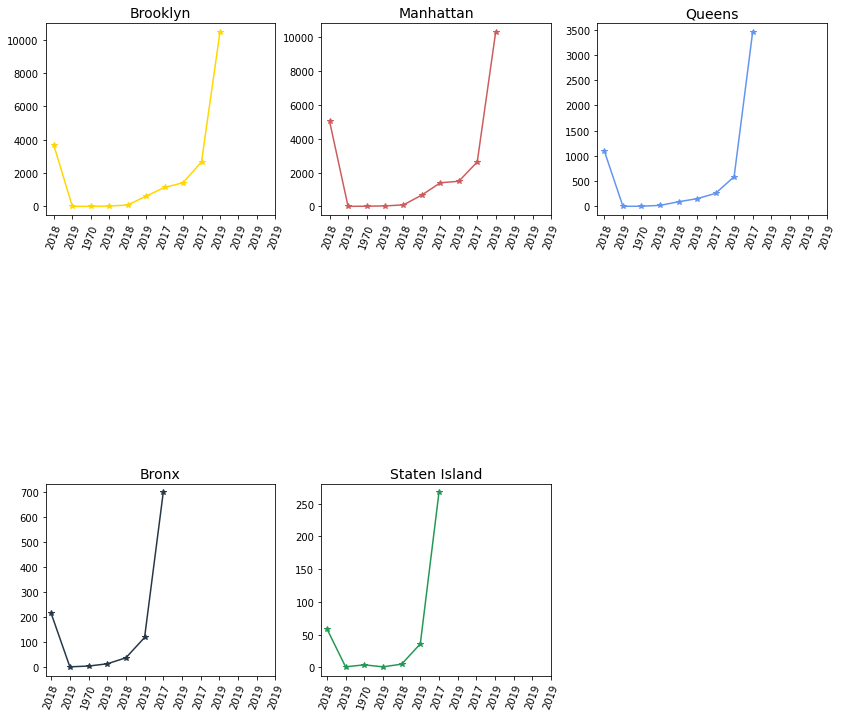

In [142]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(14,12))
#  subplot #1
plt.subplot(331)
plt.title('Brooklyn', fontsize=14)
plt.plot(bkln['year'],bkln['reviews'],'-*',color='#FFD700')
plt.xticks(ticks=np.arange(13),labels= df_copy['year'], rotation=70)

#  subplot #1
plt.subplot(332)
plt.title('Manhattan', fontsize=14)
plt.plot(mnhn['year'],mnhn['reviews'],'-*',color='#CD5C5C')
plt.xticks(ticks=np.arange(13),labels= df_copy['year'], rotation=70)

#  subplot #1
plt.subplot(333)
plt.title('Queens', fontsize=14)
plt.plot(qn['year'],qn['reviews'],'-*',color='#6495ED')
plt.xticks(ticks=np.arange(13),labels= df_copy['year'], rotation=70)

#  subplot #1
plt.subplot(337)
plt.title('Bronx', fontsize=14)
plt.plot(qx['year'],qx['reviews'],'-*',color='#273746')
plt.xticks(ticks=np.arange(13),labels= df_copy['year'], rotation=70)

#  subplot #1
plt.subplot(338)
plt.title('Staten Island', fontsize=14)
plt.plot(si['year'],si['reviews'],'-*',color='#229954')
plt.xticks(ticks=np.arange(13),labels= df_copy['year'], rotation=70)

plt.show()

In [143]:
# As per selected area, midtown & room type with  budget 
air_bnb_slice = df_copy[[ 'neighbourhood_group', 'neighbourhood', 'price', 'room_type']]
selecte_neighbourhood_group = air_bnb_slice[air_bnb_slice.neighbourhood_group == 'Brooklyn']
selecte_midtown = selecte_neighbourhood_group[air_bnb_slice.neighbourhood=='Williamsburg']
price_filter = selecte_midtown [selecte_neighbourhood_group.price < 50]
room_filter = price_filter [selecte_neighbourhood_group.room_type=='Private room']
room_filter.head()

<ipython-input-143-43932fc059d4>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-143-43932fc059d4>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-143-43932fc059d4>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,neighbourhood_group,neighbourhood,price,room_type
845,Brooklyn,Williamsburg,30,Private room
977,Brooklyn,Williamsburg,45,Private room
1337,Brooklyn,Williamsburg,48,Private room
3014,Brooklyn,Williamsburg,35,Private room
3051,Brooklyn,Williamsburg,45,Private room


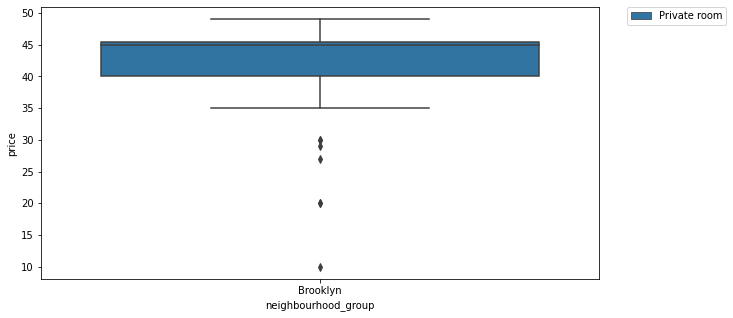

In [144]:
# Chart - 11 visualization code

sns.boxplot(x="neighbourhood_group", y="price",hue = "room_type",data=room_filter)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [145]:
#  In the data set latitude and longitude given to us, by using latitude and longitude we are assign variable to respective column for further use.
lat = np.mean(df['latitude'])
lon = np.mean(df['longitude'])
print(f'lat is{lat} and lon is {lon}')

lat is40.72894888066264 and lon is -73.95216961468454


In [146]:
# Chart - 12 visualization code

fig = px.density_mapbox(df, lat='latitude', lon='longitude', hover_name="neighbourhood" , z='price', radius=2,
                       center=dict(lat = lat, lon = lon), zoom=9,  
                        mapbox_style="open-street-map")
fig.show()

In [147]:
# Number of reviews as on room type

areas_reviews=df.groupby(['room_type'])['number_of_reviews'].max().reset_index()
areas_reviews


,room_type,number_of_reviews
0,Entire home/apt,488
1,Private room,629
2,Shared room,454


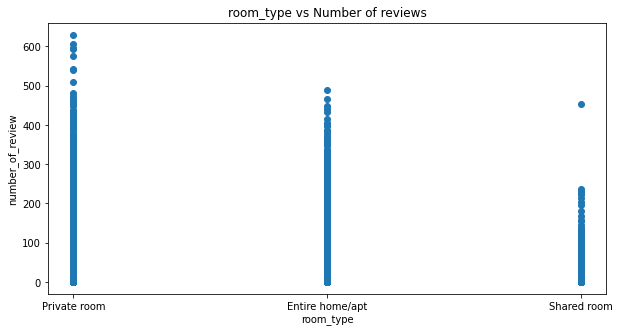

In [148]:
area=df['room_type']
price=df['number_of_reviews']
plt.scatter(area,price) #creating bar plot

plt.xlabel("room_type")
plt.ylabel("number_of_review")
plt.title("room_type vs Number of reviews")
plt.show()
